# NYC Airbnb Regression 

## Agenda:
1. [Introduction](#1)
    - 1.1 [Context](#2)
    - 1.2 [Columns Description](#3)
    - 1.3 [Objective](#4)
2. [Data Preparation](#5)
    - 2.1 [Packages & Helping Functions](#6)
    - 2.2 [Data Loading](#7)
    - 2.3 [Understanding Data](#8)
    - 2.4 [Data Cleaning](#9)
3. [Exploratory Data Analysis](#10)
    - 3.1 [Univariate Analysis](#11)
    - 3.2 [Bivariate Analysis](#12)
4. [Modeling](#13)
    - 4.2 [Splitting and Preprocessing](#14)
    - 4.3 [Linear Regression](#15)
    - 4.4 [Ridge Regression](#16)
    - 4.5 [Lasso Regression](#17)
5. [Conclusion](#18)


<h1><center>1. Introduction</center></h1><a id=1></a>

### 1.1 Context <a id=2></a>
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.
This [dataset](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

### 1.2 Columns Description <a id=3></a>
| Column | Description |
| :- | :- |
| id | A unique id for every listing |
| name | The name of the listing |
| host_id | The id of the host |
| host_name | The name of the host |
| neighbourhood_group | The location of the neighbourhood |
| neighbourhood | The name of the neighbourhood |
| latitude | Latitude coordinates of the listing |
| longitude | Longitude coordinates of the listing |
| room_type | Listing space type |
| price | The price of the listing in dollars (Target value) |
| minimum_nights | The minimum amount of nights |
| number_of_reviews | The number of reviews the listing has |
| last_review | The date of the last review the listing had |
| reviews_per_month | Number of reviews per month |
| calculated_host_list | Number of listings per host |
| availability_365 | The number of days the listing is available for out of a whole year |

### 1.3 Objective <a id=4></a>

The aim of this notebook is to perform a descriptive and exploratory analysis of the data in order to understand how the phenomena of each variable behave individually and transversely and to build a machine learning model to accurately predict the price of the listing using regression techniques

<h1><center>2. Data Preparation</center></h1><a id=5></a>

### 2.1 Packages & Helping Functions <a id=6></a>

In [1]:
# For Loading and Manipulating data
import pandas as pd
import numpy as np

# For visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

# For KDE and regression models
import mlpack

### 2.2 Data Loading<a id=7></a>

Loading the data

In [2]:
!wget -q http://lab.mlpack.org/data/AB_NYC_2019.csv

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")

### 2.3 Understanding Data <a id=8></a>

#### The first five rows of the dataset

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### The shape of the data

In [5]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (48895, 16)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Summary statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### 2.3 Data Cleaning <a id=9></a>

#### Drop unnecessary columns

In [8]:
df.drop(['name','id','host_name', 'host_id', 'last_review'], axis=1, inplace=True)

#### Null values

In [9]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")

reviews_per_month ==> Missing Values : 10052, dtypes : float64


- Most columns don't have null values
- There are 10052 missing values in `reviews_per_month` column

In [10]:
df['reviews_per_month'].dtype

dtype('float64')

We will assume that if the listing doesn't have a value for `reviews_per_month` column, it has 0 reviews per month

In [11]:
df.fillna({'reviews_per_month':0}, inplace=True)

#### Duplicates

In [12]:
df.duplicated().sum()

0

#### Categorical variables

In [13]:
categorical_cols = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        print("===============================================================================")
        print(f"{column} : {df[column].unique()}")
        categorical_cols.append(column)

neighbourhood_group : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
room_type : ['Private room' 'Entire home/apt' 'Shared room']


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [15]:
df['neighbourhood']

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48895, dtype: object

### Summary
From the previous quick overview of the data we can conclude bullet points:
- The dataset is mostly clean
- `neighbourhood_group` and `room_type` are our only categorical columns
- There is no missing values
- There are no duplicated values

<h1><center>3. Exploratory Data Analysis</center></h1><a id=10></a>

### 3.1 Univariate Analysis <a id=11></a>

#### Numerical variables

**Price distribution**

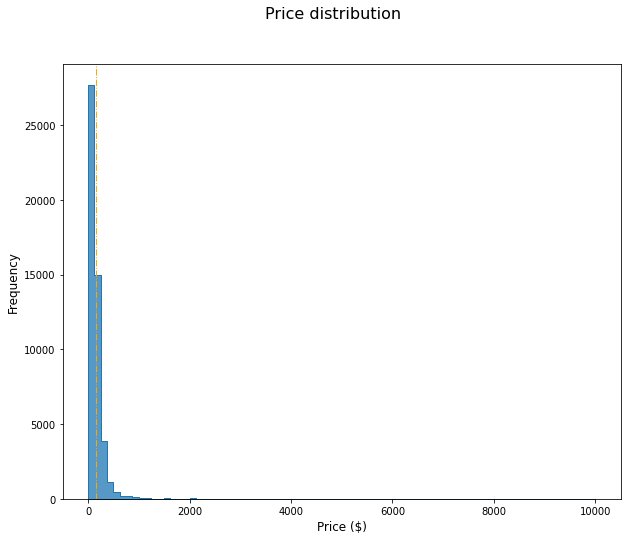

In [16]:
plt.figure(figsize=[10, 8])
ax = sns.histplot(data = df, x = 'price', bins = 80, element = 'step')
plt.suptitle('Price distribution', fontsize = 16)
plt.xlabel('Price ($)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);
plt.axvline(df['price'].mean(), color='orange', linestyle='-.', linewidth=1)
plt.show();

The graph shows that the price has a right-skewed distribution (positive skewness). We will use log transformation to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

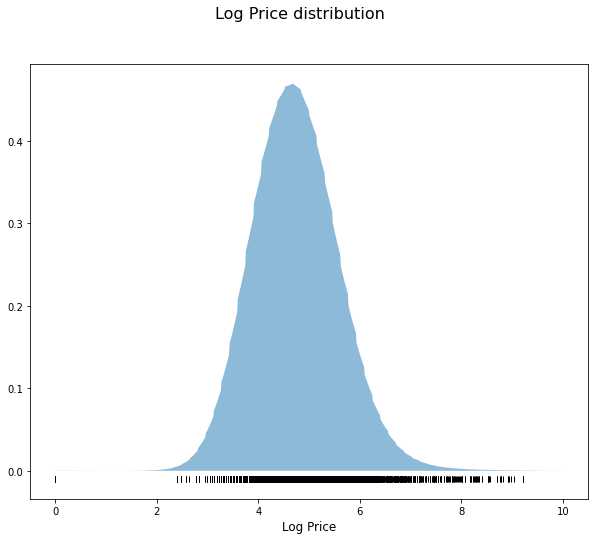

In [17]:
# + 1 to avoid devision by zero
LogPrice = np.array(np.log1p(df['price']))[:, None]
LogPrice_plot = np.linspace(0, 10, 1000)[:, np.newaxis]

output = mlpack.kde(reference = LogPrice, query = LogPrice_plot, bandwidth = 0.5, kernel='gaussian')
dens = output['predictions']

plt.figure(figsize=[10, 8])
plt.fill_between(LogPrice_plot[:, 0], dens, alpha=0.5)
plt.plot(LogPrice[:, 0], np.full_like(LogPrice[:, 0], -0.01), '|k', markeredgewidth=1);

plt.suptitle('Log Price distribution', fontsize = 16)
plt.xlabel('Log Price', fontsize = 12)
plt.show();

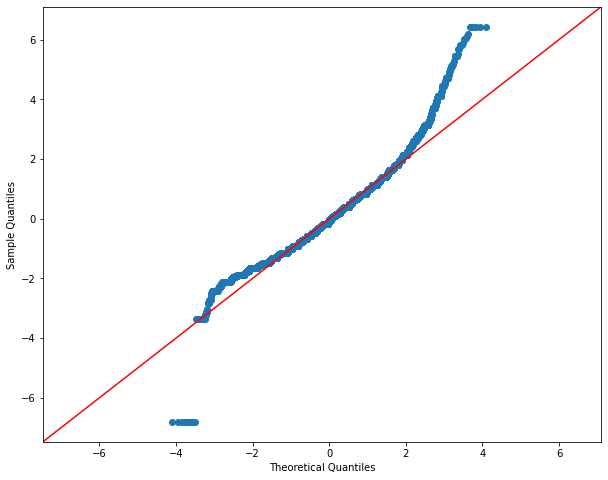

In [18]:
plt.rc("figure", figsize=(10,8))
sm.qqplot(np.log1p(df['price']), stats.norm, fit=True, line='45');

The log price distribution is roughly normal

#### Categorical variables

In [19]:
base_color = sns.color_palette()[0]

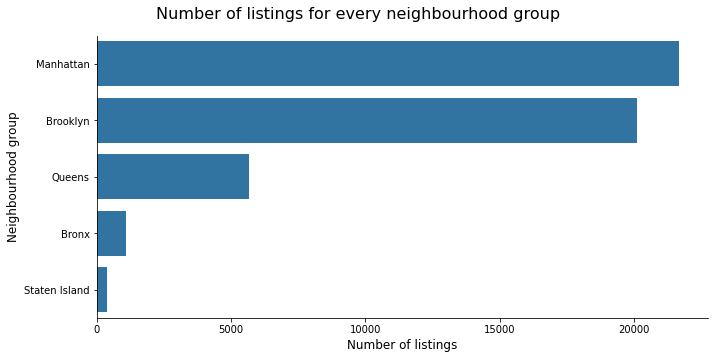

In [20]:
nh_order = df['neighbourhood_group'].value_counts().index
sns.catplot(y = "neighbourhood_group", data=df, color=base_color, 
               order = nh_order, kind = 'count', aspect = 2);

plt.subplots_adjust(top=0.9)
plt.suptitle('Number of listings for every neighbourhood group', fontsize = 16)
plt.ylabel('Neighbourhood group', fontsize = 12)
plt.xlabel('Number of listings', fontsize = 12);
plt.show();

Looking at Neighbourhood group of the listings, it stands out that the vast majority of the listings in our dataset are in Manhattan or Brooklyn

--------------------------

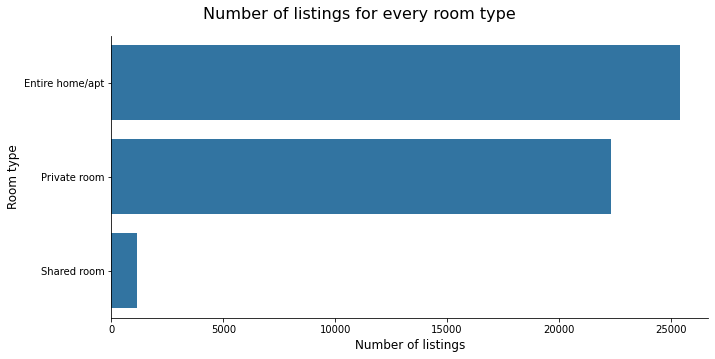

In [21]:
rt_order = df['room_type'].value_counts().index
sns.catplot(y = "room_type", data=df, color=base_color, 
               order = rt_order, kind = 'count', aspect = 2);

plt.subplots_adjust(top=0.9)
plt.suptitle('Number of listings for every room type', fontsize = 16)
plt.ylabel('Room type', fontsize = 12)
plt.xlabel('Number of listings', fontsize = 12);
plt.show();

In [22]:
len(df[df['room_type'] == 'Shared room'])

1160

We can observe that most of the listings are appartments or private rooms. 

### Observations
From the previous visualizations, we can conclude basic that:
- The price has a right-skewed distribution (positive skewness)
- The vast majority of the listings in our dataset are in Manhattan or Brooklyn
- Very few listings are in Bronx or Staten Island
- Most of the listings are appartments or private rooms (bigger area)
- Only 1160 listings are of type `Shared room`

### 3.2 Bivariate Analysis <a id=12></a>

To start off with, I want to look at the **pairwise correlations** present between features in the data.

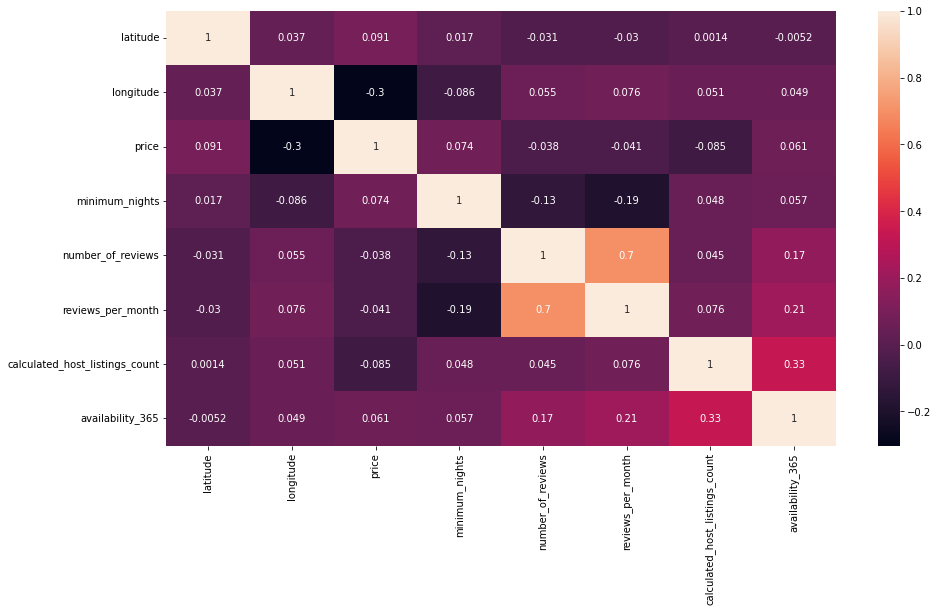

In [23]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True);

There is no strong correlation between any 2 variables except for `number_of_reviews` and `reviews_per_month` which is self-explanatory

---------------------

Next, Let's see how the **`neighbourhood`** of the listings affects its **`price`** 

In [24]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.groupby("neighbourhood_group")["price"].describe().T

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1091.0,20104.0,21661.0,5666.0,373.0
mean,87.5,124.4,196.9,99.5,114.8
std,106.7,186.9,291.4,167.1,277.6
min,0.0,0.0,0.0,10.0,13.0
25%,45.0,60.0,95.0,50.0,50.0
50%,65.0,90.0,150.0,75.0,75.0
75%,99.0,150.0,220.0,110.0,110.0
max,2500.0,10000.0,10000.0,10000.0,5000.0


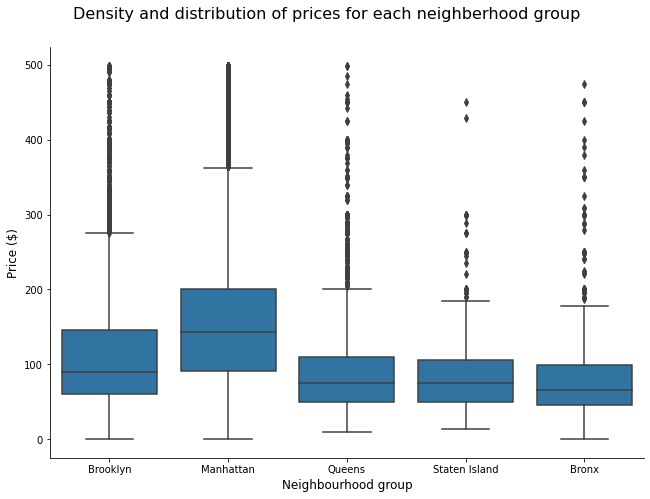

In [25]:
# abandonning extreme values for better visualizations
dfsub = df[df.price < 500]
sns.catplot(data = dfsub, x = 'neighbourhood_group', y = 'price', kind = 'box', color=base_color, 
            height = 7, aspect = 1.3);

plt.subplots_adjust(top=0.9)
plt.suptitle('Density and distribution of prices for each neighberhood group', fontsize = 16)
plt.ylabel('Price ($)', fontsize = 12)
plt.xlabel('Neighbourhood group', fontsize = 12);
plt.show();

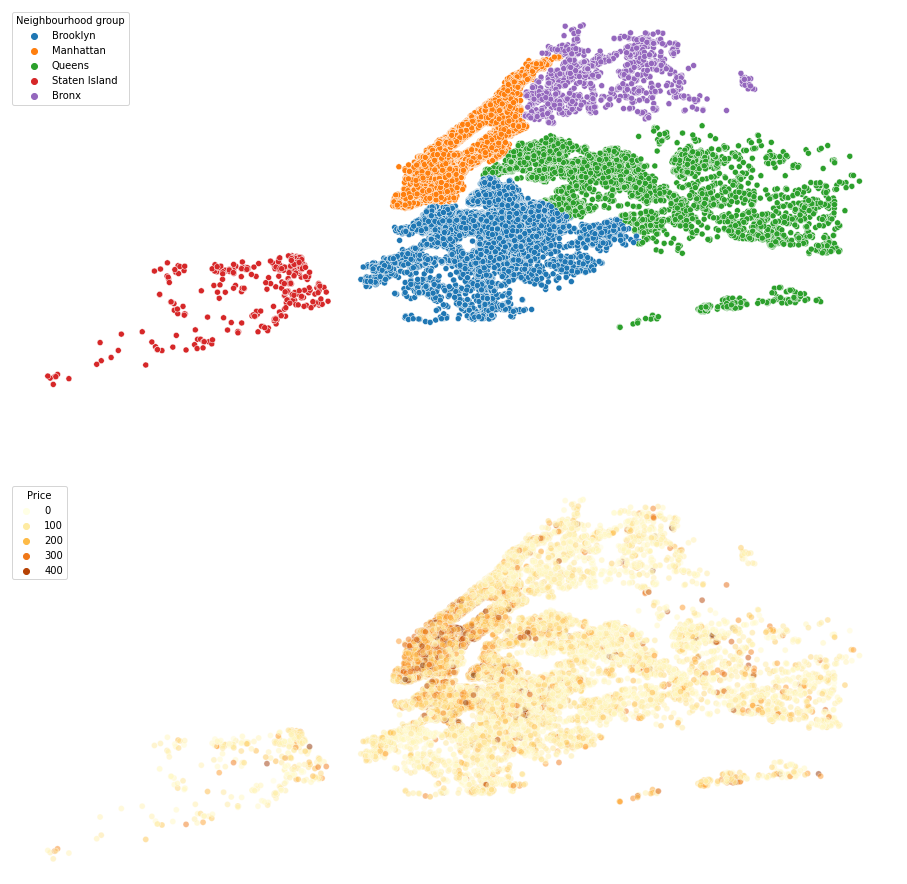

In [26]:
f, ax = plt.subplots(2, 1, figsize=(16,16))


f1 = sns.scatterplot(data = df, x = 'longitude' , y = 'latitude' , hue = 'neighbourhood_group'
                    , ax=ax[0])
f1.legend(title='Neighbourhood group', loc='upper left')
f1.axis('off')


f2 = sns.scatterplot(data = dfsub, x = 'longitude' , y = 'latitude' , hue = 'price', 
                     palette = 'YlOrBr', alpha = 0.5,  ax=ax[1])
f2.legend(title='Price', loc='upper left')
f2.axis('off')
plt.show();

Using the stastistical table, the box plot and the scatter plots, we can definitely observe some points about the effect of the neighbourhood group on the price
    
- First of all, Manhattan has the highest range of prices with 196.9 usd as its mean listing price
- Brooklyn comes second in terms of price with its mean listing price at 124.4 usd
- Queens and Staten Island both have very similar distributions but Staten Queens has more high end listing

-------------------------

How does the **room type** affect the **price**?

In [27]:
df.groupby("room_type")["price"].describe().T

room_type,Entire home/apt,Private room,Shared room
count,25409.0,22326.0,1160.0
mean,211.8,89.8,70.1
std,284.0,160.2,101.7
min,0.0,0.0,0.0
25%,120.0,50.0,33.0
50%,160.0,70.0,45.0
75%,229.0,95.0,75.0
max,10000.0,10000.0,1800.0


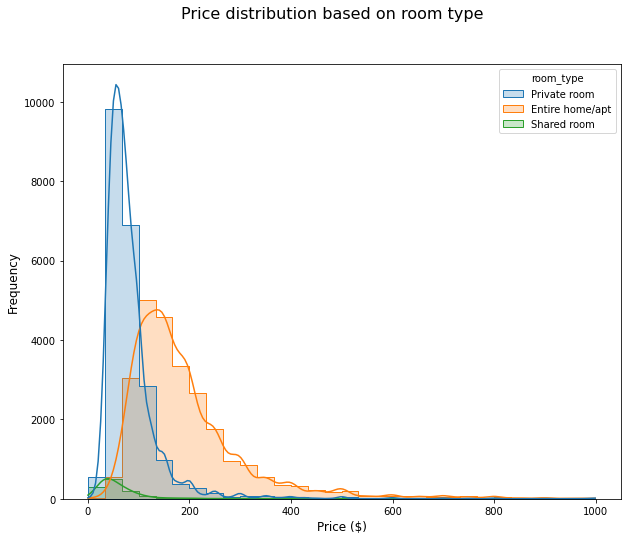

In [28]:
dfsub = df[df['price'] < 1000]
plt.figure(figsize=[10, 8])
ax = sns.histplot(data = dfsub, x = 'price', hue = 'room_type', bins = 30, kde=True, element = 'step')
plt.suptitle('Price distribution based on room type', fontsize = 16)
plt.xlabel('Price ($)', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);
plt.show();

Interestingly, the plot shows that:
- The difference in price between entire homes and private rooms is quite large (120 usd on average)
- However, the difference between private rooms and shared rooms prices is relatively low (20 usd on average)

### Observations
From the previous analysis, we can conclude that:
- There is no strong correlation between the price of the listing and any other variable
- Manhattan and Brooklyn share similar patterns in almost every aspect of features on the listing. They are most attractive (among the five boroughs) to guests with relatively higher host price
- Manhattan has the highest range of prices with a mean of 196.9 usd while Brooklyn comes second with a mean listing price of 124.4 usd
- Queens and Staten Island both have very similar distributions but Staten Queens has more high end listing
- The difference in price between entire homes and private rooms is quite large
- However, the difference between private rooms and shared rooms prices is relatively low (20 usd on average)

<h1><center>4. Modeling</center></h1><a id=13></a>

### 4.2 Splitting and Preprocessing <a id=14></a>

**Preprocessing**

In [29]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [30]:
features = ['neighbourhood_group', 'room_type', 'availability_365', 'minimum_nights',
            'calculated_host_listings_count', 'reviews_per_month', 'number_of_reviews']

In [31]:
X = df[features]
y = df["price"]

**One-Hot-Encoding Categorical Variables**

In [32]:
dummy_NhG = pd.get_dummies(X['neighbourhood_group'], prefix='dummy')
dummy_RT = pd.get_dummies(X['room_type'], prefix='dummy')

X = pd.concat([X, dummy_NhG, dummy_RT],axis=1)
X.drop(['neighbourhood_group', 'room_type'],axis=1, inplace=True)

In [33]:
X.head()

,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,number_of_reviews,dummy_Bronx,dummy_Brooklyn,dummy_Manhattan,dummy_Queens,dummy_Staten Island,dummy_Entire home/apt,dummy_Private room,dummy_Shared room
0,365,1,6,0.2,9,0,1,0,0,0,0,1,0
1,355,1,2,0.4,45,0,0,1,0,0,1,0,0
2,365,3,1,0.0,0,0,0,1,0,0,0,1,0
3,194,1,1,4.6,270,0,1,0,0,0,1,0,0
4,0,10,1,0.1,9,0,0,1,0,0,1,0,0


**Train Test Split**

In [34]:
output = mlpack.preprocess_split(input = X, input_labels = y, test_ratio = 0.1)
X_train = output['training']
y_train = output['training_labels'][:, 0]
X_test = output['test']
y_test = output['test_labels'][:, 0]

In [35]:
print(f"The shape of Xtrain is      {X_train.shape}")
print(f"The shape of Xtest is       {X_test.shape}")
print(f"The shape of ytrain is      {y_train.shape}")
print(f"The shape of ytest is       {y_test.shape}")

The shape of Xtrain is      (44006, 13)
The shape of Xtest is       (4889, 13)
The shape of ytrain is      (44006,)
The shape of ytest is       (4889,)


**Evaluation Metrics**

- `Mean Absolute Error` is a quantity used to measure how close forecasts or predictions are to the eventual outcomes. The mean absolute error is given by formula:
$$ MAE = \frac{\sum_{i=1}^n\lvert y_{i} - \hat{y_{i}}\rvert} {n} $$
    
- `Mean Squared Error` measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value
$$ MSE = \frac {1}{n} \sum_{i=1}^n (y_{i} - \hat{y_{i}})^2 $$

- `Root Mean Squared Error` is the standard deviation of the residuals
$$ RMSE = \sqrt{\frac {1}{n} \sum_{i=1}^n (y_{i} - \hat{y_{i}})^2} $$

In [36]:
def r2score(y_true, y_preds):
    corr_matrix = np.corrcoef(y_true, y_preds)
    corr = corr_matrix[0,1]
    R2 = corr**2
    return R2 

In [37]:
def modelEval(ytest, yPreds):
    print("---- Evaluation Metrics ----")
    print(f"Mean Absoulte Error: {np.mean(np.abs(yPreds - ytest)):.2f}")
    print(f"Mean Squared Error: {np.mean(np.power(yPreds - ytest, 2)):.2f}")
    print(f"Root Mean Squared Error: {np.sqrt(np.mean(np.power(yPreds - ytest, 2))):.2f}")
    print(f"R2 score: {r2score(ytest, yPreds):.2f}")
    #Error
    print("----------------------------")
    error_diff = pd.DataFrame({'Actual Values': np.array(ytest).flatten(), 'Predicted Values': yPreds.flatten()})
    print(error_diff.head(5))

### 4.3 Linear Regression<a id=15></a>

In [38]:
output = mlpack.linear_regression(training = X_train, training_responses = y_train)
lr_model = output["output_model"]

In [39]:
predictions = mlpack.linear_regression(input_model = lr_model, test = X_test)

In [40]:
yPreds = predictions["output_predictions"].reshape(-1, 1).squeeze()

In [41]:
modelEval(y_test, yPreds)

---- Evaluation Metrics ----
Mean Absoulte Error: 69.71
Mean Squared Error: 34313.76
Root Mean Squared Error: 185.24
R2 score: 0.13
----------------------------
   Actual Values  Predicted Values
0            499             255.6
1            450             297.2
2            100              76.0
3            300             223.4
4             65             144.9


### 4.4 Ridge Regression<a id=16></a>

In [42]:
output = mlpack.linear_regression(training = X_train, training_responses = y_train, lambda_= 0.1)
rr_model = output["output_model"]

In [43]:
predictions = mlpack.linear_regression(input_model = rr_model, test = X_test)

In [44]:
yPreds = predictions["output_predictions"].reshape(-1, 1).squeeze()

In [45]:
modelEval(y_test, yPreds)

---- Evaluation Metrics ----
Mean Absoulte Error: 69.71
Mean Squared Error: 34313.75
Root Mean Squared Error: 185.24
R2 score: 0.13
----------------------------
   Actual Values  Predicted Values
0            499             255.6
1            450             297.2
2            100              76.0
3            300             223.4
4             65             144.9


### 4.5  Lasso Regression <a id=17></a>

In [46]:
X_train.shape

(44006, 13)

In [47]:
y_train.shape

(44006,)

In [48]:
output = mlpack.lars(input = X_train, responses = y_train, lambda1=0.4, lambda2=0.1)
LassoR_model = output['output_model']

[FATAL] Number of responses must be equal to number of rows of X!



RuntimeError: fatal error; see Log::Fatal output

<h1><center>5. Conclusion</center></h1><a id=18></a>